# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of test labels: (10000, 1)
Number of classes: 100
Image dimensions: 32x32 with 3 channels


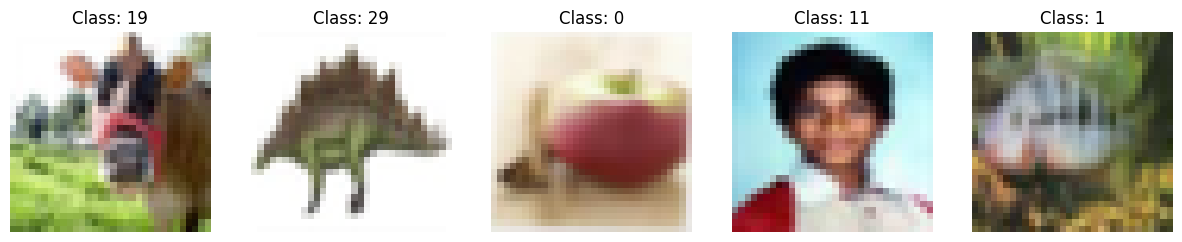

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Explore the dataset
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test labels:", y_test.shape)

# Get the number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Dimensions of images
img_height, img_width, img_channels = x_train.shape[1:]
print(f"Image dimensions: {img_height}x{img_width} with {img_channels} channels")

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Class: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Normalize the images (pixel values range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# 3. Split the training set into training and validation sets (80%-20% split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
model = Sequential([
    # 1st Convolutional Block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolutional Block
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 4th Convolutional Block
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,516 (2.58 MB)

 Trainable params: 676,516 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy - Categorical crossentropy is used as a loss function in classification problems where the target variable is a category. In the context of the CIFAR-100 dataset, which has 100 different classes, categorical crossentropy is appropriate because it measures the performance of a classification model whose output is a probability value between 0 and 1 for each of the 100 classes.


- <b>Optimizer:</b> Adam - Adam is used because it adapts the learning rate for each parameter and speeds up training with efficient and robust performance. This makes it a good default choice for training deep learning models.

In [5]:
from keras import optimizers

# Your code here
from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    loss='categorical_crossentropy',     # Loss function
    metrics=['accuracy']                 # Evaluation metric
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
history = model.fit(
    x_train, y_train,                   # Training data
    validation_data=(x_val, y_val),     # Validation data
    epochs=15,                          # Number of epochs
    batch_size=32,                      # Batch size
    verbose=1                           # Display progress
)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0444 - loss: 4.2613 - val_accuracy: 0.1701 - val_loss: 3.4506
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1922 - loss: 3.3106 - val_accuracy: 0.2584 - val_loss: 3.0044
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2797 - loss: 2.8528 - val_accuracy: 0.3094 - val_loss: 2.7271
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3558 - loss: 2.5034 - val_accuracy: 0.3366 - val_loss: 2.6117
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4157 - loss: 2.2053 - val_accuracy: 0.3669 - val_loss: 2.4954
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4691 - loss: 1.9726 - val_accuracy: 0.3672 - val_loss: 2.5121
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5243 - loss: 1.7341 - val_accuracy: 0.3788 - val_loss: 2.5227
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5733 - loss: 1.5197 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> .3494
- <b>Other metric:</b> f1 Score (Macro Average)
- <b>Reason for selection:</b> The F1 Score (Macro Average) is selected because it considers both precision and recall, providing a balanced measure of the model's performance across all classes. It is particularly useful in cases where the class distribution is imbalanced.
- <b>Value of metric:</b> .3508
- <b>Interpretation of metric value:</b> An F1 Score of 0.3508 indicates that the model's performance in terms of precision and recall is relatively low. This suggests that while the model may have a decent accuracy, it struggles with correctly identifying true positives and minimizing false positives and false negatives across all classes.

In [7]:
from sklearn.metrics import f1_score
import numpy as np

# Predict the classes on the test set
y_pred_classes = model.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred_classes, axis=1)

# If y_test is one-hot encoded, convert it to class labels
y_true = np.argmax(y_test, axis=1)  # In case y_test is one-hot encoded

# Calculate the F1 score for each class (micro average, macro average, etc.)
f1 = f1_score(y_true, y_pred_classes, average='macro')  # or 'weighted', 'micro', 'samples', etc.

print(f'F1 Score (Macro Average): {f1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1 Score (Macro Average): 0.3508


In [8]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred = model.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3548 - loss: 4.2223
Test Accuracy: 0.3522
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0     0.6000    0.6600    0.6286       100
           1     0.4151    0.4400    0.4272       100
           2     0.2000    0.1700    0.1838       100
           3     0.2000    0.1900    0.1949       100
           4     0.2857    0.1200    0.1690       100
           5     0.2766    0.2600    0.2680       100
           6     0.3774    0.4000    0.3883       100
           7     0.4598    0.4000    0.4278       100
           8     0.4074    0.4400    0.4231       100
           9     0.3619    0.3800    0.3707       100
          10     0.1974    0.3000    0.2381       100
          11     0.2083    0.2000    0.2041       100
          12     0.2830    0.4500    0.3475       100
          13     0.3864    0.3400    0.3617       100
          14     0.2315    0.2500    0.2404       1

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

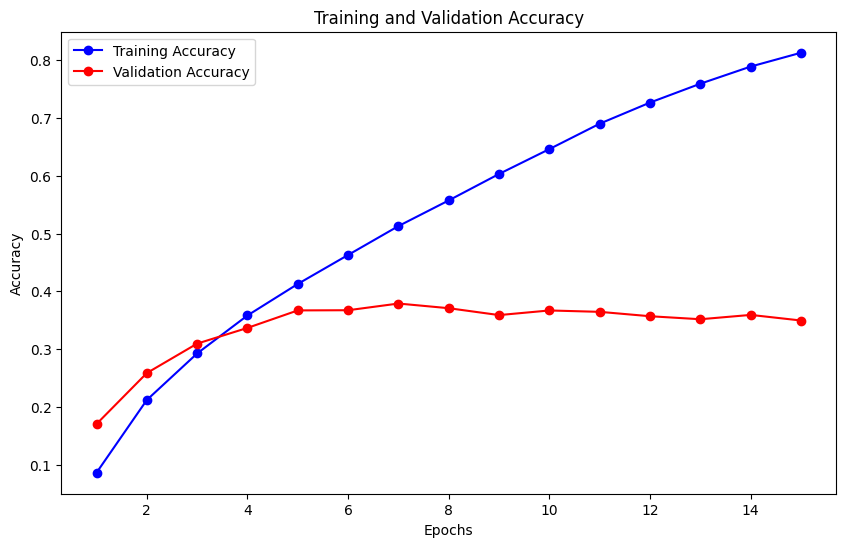

In [9]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The plot shows training accuracy increasing while validation accuracy plateaus, indicating overfitting. This is expected as the model becomes too specialized to the training data. Classification probabilities, visualized elsewhere, reflect the model's confidence. High probabilities for correct predictions and low for incorrect ones are desirable. Overfitting suggests potential for improvement through regularization or other techniques.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


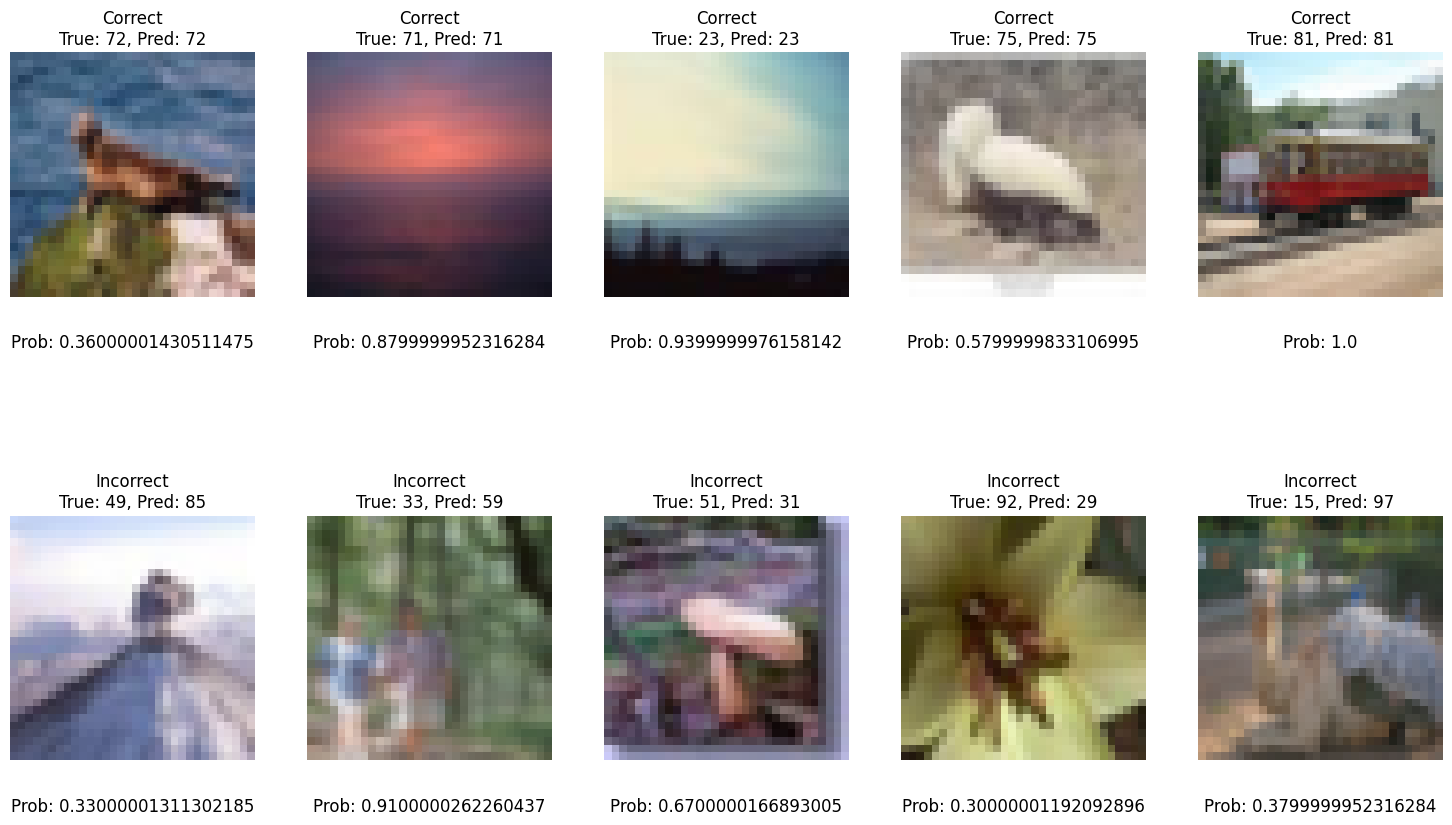

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Find correctly classified image indices
correct_indices = np.where(y_pred_classes == y_true)[0]

# Find incorrectly classified image indices
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select 5 correct and 5 incorrect images
correct_images = correct_indices[:5]
incorrect_images = incorrect_indices[:5]

# Plot the correctly classified images
plt.figure(figsize=(15, 10))

for i, idx in enumerate(correct_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Correct\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

# Plot the incorrectly classified images
for i, idx in enumerate(incorrect_images):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Incorrect\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [11]:
from keras.layers import Dropout

# Redefine the model with Dropout layers
model_with_dropout = Sequential()

# Add convolutional layers with Dropout
model_with_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout added

model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout added

model_with_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers with Dropout
model_with_dropout.add(Flatten())
model_with_dropout.add(Dense(512, activation='relu'))
# Output layer
model_with_dropout.add(Dense(100, activation='softmax'))

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Model summary
model_with_dropout.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

The technique used here is Dropout. Dropout is a regularization method that helps prevent overfitting in neural networks. It works by randomly dropping out (setting to zero) a fraction of the neurons during each training iteration. This forces the network to learn more robust features that are less reliant on individual neurons, thereby improving generalization.

Reason for Choice:
Dropout is a widely used and effective technique for reducing overfitting, which was observed in the baseline model. It is relatively easy to implement and can be applied to various layers in the network.

Dropout, the technique employed, requires tuning the dropout rate hyperparameter. A rate of 0.25 was selected as a starting point, falling within the commonly recommended range of 0.2 to 0.5 for hidden layers. This value aims to balance regularization strength and learning capacity. Further optimization could involve techniques like grid search or random search to explore different dropout rates and identify the value that yields the best performance on a validation set.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [12]:
# Train the model
history_dropout = model_with_dropout.fit(
    x_train, y_train,                   # Training data
    validation_data=(x_val, y_val),     # Validation data
    epochs=20,                          # Number of epochs
    batch_size=32,                      # Batch size
    verbose=1                           # Display progress
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0563 - loss: 4.2180 - val_accuracy: 0.1724 - val_loss: 3.4596
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1928 - loss: 3.3516 - val_accuracy: 0.2324 - val_loss: 3.1357
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2574 - loss: 3.0086 - val_accuracy: 0.2776 - val_loss: 2.9272
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3044 - loss: 2.7559 - val_accuracy: 0.3108 - val_loss: 2.7833
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3402 - loss: 2.5667 - val_accuracy: 0.3192 - val_loss: 2.7117
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3677 - loss: 2.4343 - val_accuracy: 0.3410 - val_loss: 2.6037
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3964 - loss: 2.3099 - val_accuracy: 0.3407 - val_loss: 2.6087
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4143 - loss: 2.1960 -

In [13]:
# Predict the classes on the test set
y_pred_classes = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred_classes, axis=1)

# If y_test is one-hot encoded, convert it to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate the F1 score for each class (micro average, macro average, etc.)
f1_dropout = f1_score(y_true, y_pred_classes, average='macro')

print(f'F1 Score (Macro Average): {f1_dropout:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score (Macro Average): 0.3552


In [14]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model_with_dropout.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Generate a classification report
report_dropout = classification_report(y_true, y_pred_classes, digits=4)
print(report_dropout)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3595 - loss: 2.9210
Test Accuracy: 0.3585
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0     0.6809    0.6400    0.6598       100
           1     0.3750    0.4200    0.3962       100
           2     0.3495    0.3600    0.3547       100
           3     0.1920    0.2400    0.2133       100
           4     0.2143    0.1800    0.1957       100
           5     0.3409    0.1500    0.2083       100
           6     0.3798    0.4900    0.4279       100
           7     0.3717    0.4200    0.3944       100
           8     0.4078    0.4200    0.4138       100
           9     0.6190    0.3900    0.4785       100
          10     0.2088    0.1900    0.1990       100
          11     0.2250    0.1800    0.2000       100
          12     0.4070    0.3500    0.3763       100
          13     0.3220    0.1900    0.2390       100
          14     0.5167    0.3100    0.3875       1

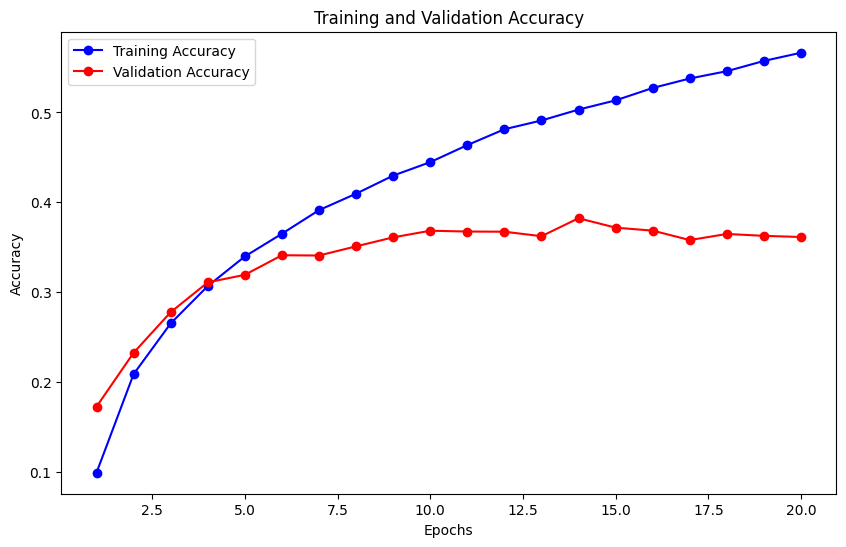

In [15]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from history
training_accuracy = history_dropout.history['accuracy']
validation_accuracy = history_dropout.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


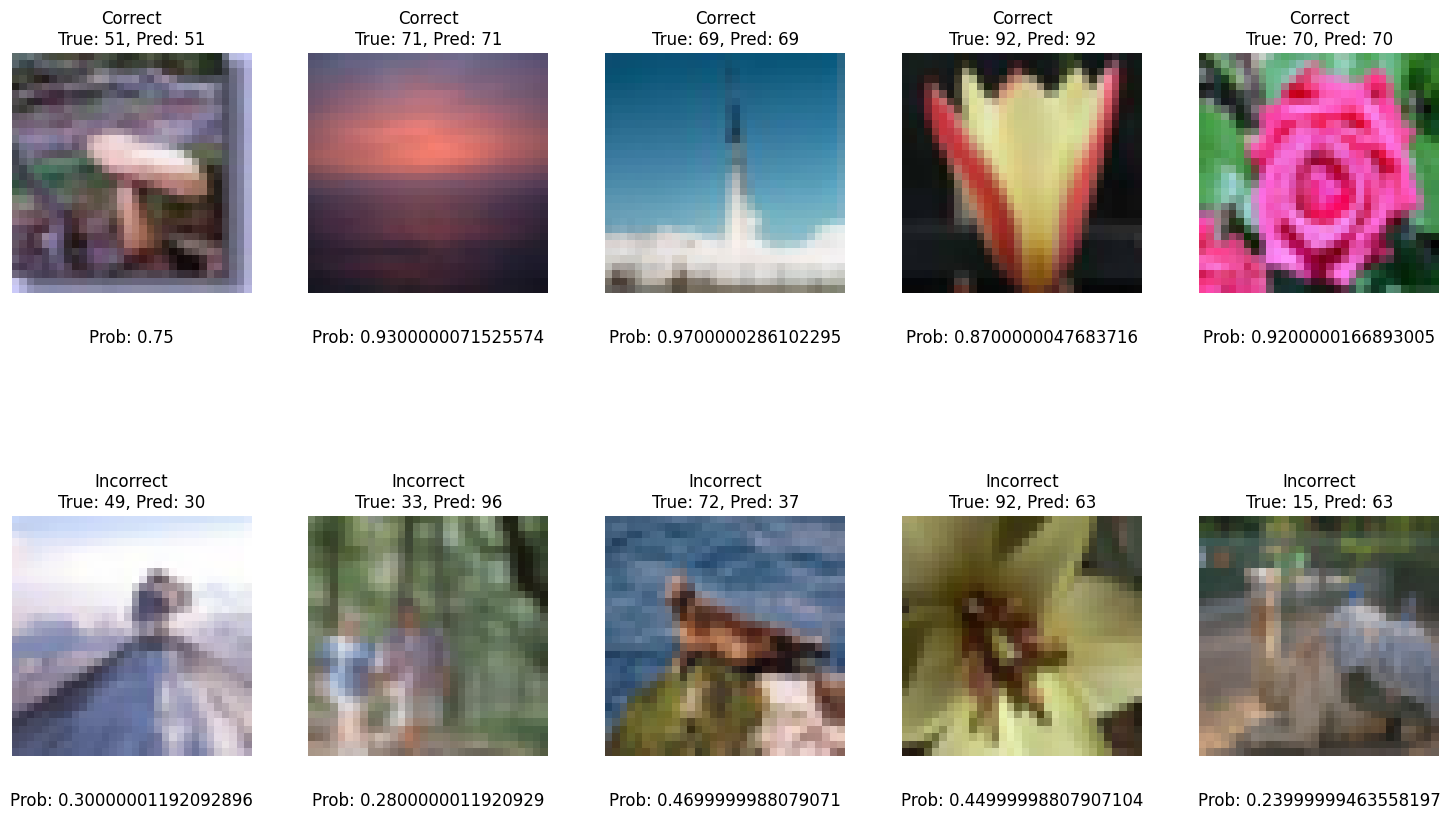

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
y_pred = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Find correctly classified image indices
correct_indices = np.where(y_pred_classes == y_true)[0]

# Find incorrectly classified image indices
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select 5 correct and 5 incorrect images
correct_images = correct_indices[:5]
incorrect_images = incorrect_indices[:5]

# Plot the correctly classified images
plt.figure(figsize=(15, 10))

for i, idx in enumerate(correct_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Correct\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

# Plot the incorrectly classified images
for i, idx in enumerate(incorrect_images):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Incorrect\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

Incorporating Dropout yielded a modest improvement in model performance on the CIFAR-100 dataset. Both accuracy and macro-averaged F1 score increased marginally, likely due to Dropout's regularization effect mitigating overfitting observed in the baseline model. Learning curves now show less divergence, suggesting better generalization.


Despite the improvement, accuracy remains relatively low, indicating room for further enhancement. Data augmentation, transfer learning with pre-trained models, and exploring more complex architectures could be explored for better performance.

Future work will involve implementing data augmentation, leveraging transfer learning, and experimenting with more complex architectures to significantly improve accuracy on the CIFAR-100 dataset. Hyperparameter tuning will also be explored for optimal performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.